In [178]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [179]:
df = pd.read_csv("Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [181]:
df.drop(columns=["CustomerID", "Gender"], inplace=True)

In [182]:
df.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [183]:
df.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [184]:
df.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [185]:
df.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: ylabel='Annual Income (k$)'>

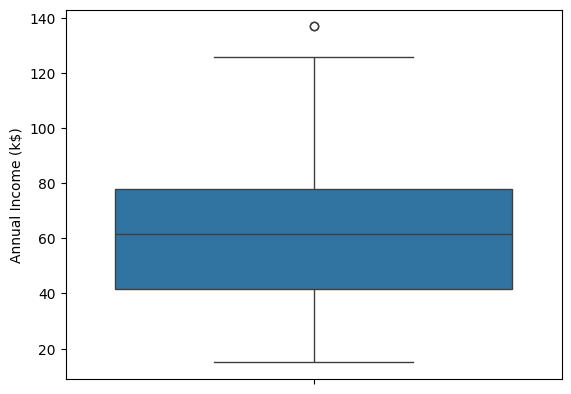

In [186]:
sns.boxplot(df["Annual Income (k$)"])

<Axes: ylabel='Spending Score (1-100)'>

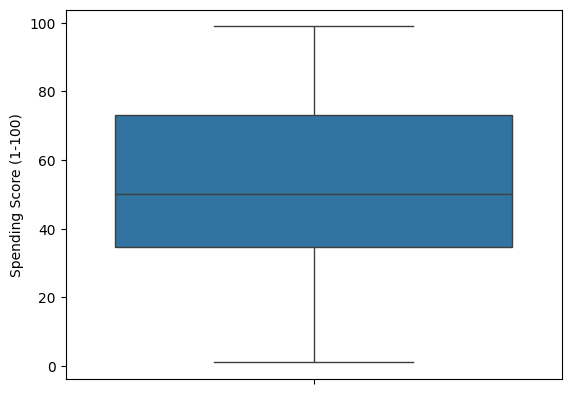

In [187]:
sns.boxplot(df["Spending Score (1-100)"])

<Axes: ylabel='Annual Income (k$)'>

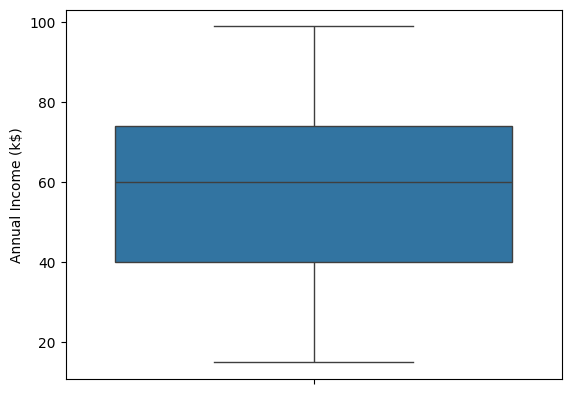

In [188]:
df = df[~(df["Annual Income (k$)"] > 100)]

sns.boxplot(df["Annual Income (k$)"])

In [189]:
# cari duplikasi data

In [190]:
for col in df.columns:

    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

df.head()
df['Annual Income (k$)'].min()

0.0

In [191]:
class Kmeans():
    def __init__(self, n_cluster=2, max_iteration=100):
        self.n_cluster = n_cluster
        self.max_iteration = max_iteration
        self.centroids = None
        self.inertia = 0
        self.label = None

    def fit(self, x):
        self.centroids = np.random.uniform(np.amin(x, axis=0), np.amax(x, axis=0), size=(self.n_cluster, x.shape[1]))                     

        for iteration in range(self.max_iteration):
            self.label = []
            distance_cluster = []

            for item in x:
                distance = np.sqrt(np.sum((item - self.centroids)**2, axis=1))
                distance_cluster.append(np.min(distance))
                cluster = np.argmin(distance)
                self.label.append(cluster)

            self.label = np.array(self.label)
            distance_cluster = np.array(distance_cluster)
            groups = []


            for i in range(self.n_cluster):
                groups.append(np.argwhere(self.label == i))

            
            new_centroids = []
            mean_inertia = []

            for i, indices in enumerate(groups):

                if len(indices) == 0:
                    new_centroids.append(self.centroids[i])
                else:
                    mean_inertia.append(np.sum(distance_cluster[indices]))
                    new_centroids.append(np.mean(x[indices], axis=0)[0])

            self.inertia = np.mean(np.array(mean_inertia)**2)

            if np.max(np.abs(np.array(new_centroids) - self.centroids)) < 0.0001:
                break
            else:
                self.centroids = new_centroids


In [192]:
model = Kmeans(n_cluster=2, max_iteration=300)

model.fit(df.to_numpy())

In [193]:
model.inertia

1035.903199688093

In [194]:
wcss = []

for k in range(1, 11):
    model = Kmeans(n_cluster=k, max_iteration=200)
    model.fit(df.to_numpy())

    wcss.append(model.inertia)

In [195]:
wcss

[6448.14664412334,
 1029.9899096754,
 389.7247951463785,
 158.1881628748509,
 83.45010689269728,
 38.349618250535805,
 49.988520006719455,
 16.734924193496703,
 11.894090692671,
 10.283852743318304]

Text(0, 0.5, 'wcss')

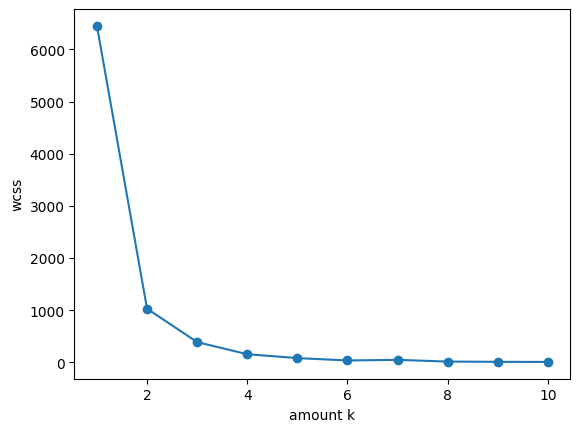

In [196]:
plt.plot(np.arange(1, 11), wcss, marker="o")
plt.xlabel("amount k")
plt.ylabel("wcss")


In [197]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [198]:
kmean = Kmeans(n_cluster=4)

kmean.fit(df.to_numpy())


Text(0.5, 0, 'Spending Score (1-100)')

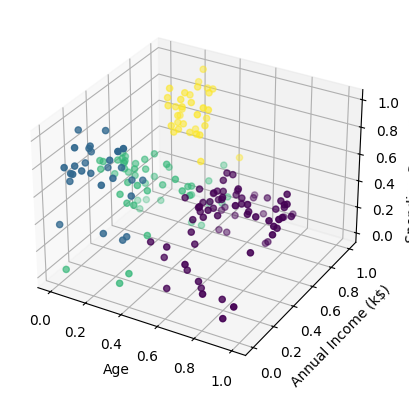

In [199]:
ax = plt.axes(projection='3d')

ax.scatter3D(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], c=kmean.label)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

In [200]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(df)

c:\Users\Rizal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

Text(0.5, 0, 'Spending Score (1-100)')

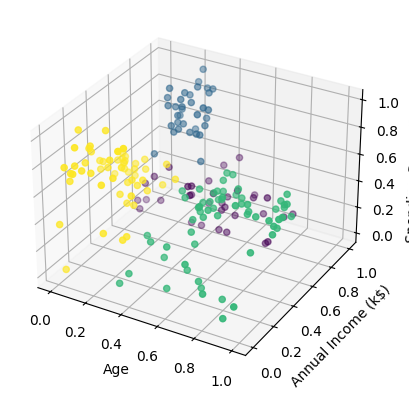

In [201]:
ax = plt.axes(projection='3d')

ax.scatter3D(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], c=model.labels_)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

In [202]:
print("mine ", kmean.centroids)
print("scikit ", model.cluster_centers_)

mine  [array([0.69678609, 0.46803653, 0.36622868]), array([0.16208791, 0.1292517 , 0.7244898 ]), array([0.19268477, 0.53968254, 0.36934774]), array([0.29015837, 0.78081232, 0.81542617])]
scikit  [[0.42590498 0.76470588 0.19867947]
 [0.28223982 0.76960784 0.82052821]
 [0.69416873 0.3765361  0.40322581]
 [0.14251374 0.29187925 0.60586735]]
